## Proyecto ML - Diego Barón - 1214719232



# Explorando las colisiones a TeV de LHC usando Machine learning.









**Tabla de contenidos:**
1. Introduccion
2. Marco conceptual
    1. Tensorflow y DNN. 
    2. CMS en el LHC.
    3. Modelo a estudiar.
    4. Base de Datos.
3. Implementacion computacional.
    1. Preparacion de los datos.
    2. ML con NN.
    3. ML con DNN.
4. Resultados y Conclusiones.
5. Bibliografía.


# 1. Introducción.

La física de partículas es la ciencia que estudia los constituyentes fundamentales de la naturaleza y las interacciones que hay entre los mismos, en particular se distinguen dos ramas: la física teórica de particulas (THEP) y la física de particulas experimental (EHEP). Los físicos de partículas experimentales son los encargados de poner a prueba los modelos de sus compañeros los teóricos, esto se traduce en encontrar las nuevas partículas e interacciones propuestas en los modelos y la herramienta más poderosa que se tiene hoy en día para alcanzar este fin son los colisionadores. 

A día de hoy el colisionador que logra las reacciones subatómicas más energéticas es el Gran Colisionador de Hadrones (LHC) (7 TeV por haz), sin embargo, aún cuando estas escalas de energía nos permiten acceder a nueva física (el primer éxito del LHC fue el descubrimiento en 2012 del boson de Higgs [REFERNCIA HIGGS PAPER]), no es para nada sencillo el proceso de descubrimiento de una nueva partícula. El LHC produce grandes cantidades de datos, aproximadamente 1 PB/s, estos deben ser filtrados, por ejemplo: el LHC produce $10^{11}$ colisiones por hora, de las cuales solo 300 involucran a bosones de Higgs. Además los datos deben ser analizados a la luz de las restricciones que provienen de los modelos teóricos, mediante algoritmos de selección, que determinan que eventos provienen de procesos diferentes a los del modelo estándar.

Este parece el panorama ideal para utilizar métodos de machine learning (ML): grandes cantidades de datos y tareas de clasificación. Esta no es una idea nueva y previamente se han implementado métodos de ML, como el de redes neuronales (NN) para realizar estas tareas de clasificación, sin embargo hasta hace unos años existían problemas como el problema del desvanecimiento del gradiente, que no permitían el entrenamiento eficiente de redes neuronales profundas (DNN), en este trabajo pretendendo utilizar algunas de las técnicas más recientes que permiten resolver algunos problemas de entrenamiento de DNN y comparar con trabajos que ya los han utilizado [REFERENCIA PAPER PRINCIPAL]. De hecho como conclusión de estos recientes estudios, se esgrime la idea de que las técnicas de ML son más eficientes que las actuales técnicas usadas en física de partículas.

Para el entrenamiento de las DNN usaremos la libreria TensorFlow [REFERENCIA TENSORFLOW], que fue liberada en 2015 por Google, esta libreria soporta el uso de GPUS y sus operaciones internas se basan en gráficos de flujo.

# 2. Marco conceptual.

# A. Tensorflow y DNN.

Tensorflow es una libreria de código abierto para computación numérica, está especificamente diseñada para aprendizaje automático. Su principio de operación es basico: mediante Python creamos un gráfico de cálculos a realizar y luego Tensorflow interpreta el gráfico y lo corre eficientemente usando rutinas optimizadas de C++.

Es muy importante decir que el gráfico se puede dividir en pequeñas secciones que pueden ser ejecutadas independientemente en varias CPU o GPU, esto permite entrenar redes neuronales muy grandes, con millones de instancias utilizando multiples servidores. Tensorflow fue desarrollado por Google y está detras de proyectos como Google Fotos, Google Busqueda, Google dictado.

Algunas caracteríticas interesantes de Tensorflow son:

* No solo corre en sistemas operativos de computadoras sino también dispositivos móviles como Android y iOs.
* Provee una API que lo hace compatible con Scikit-Learn.
* Contiene funciones muy eficientes implementadas en C++ para su uso en la construcción de redes neuronales.
* Utiliza el método de diferenciación automática para calcular gradientes.
* Posee una interfaz de visualización llamada *Tensor Board* que permite buscar en el gráfico computacional y ver curvas de aprendizaje, entre otras cosas.





# B. CMS en el LHC.

El Gran Colisionador de Hadrones (LHC) es el acelerador de partículas más grande y energético operado actualmente por la Organización Europea para la Investigación Nuclear (CERN), el LHC usa el mismo tunel de 27 km, cavado en promedio a 100 m de profundidad, del antiguo Gran Colisionador Electrón-Positrón (LEP). EL LHC es capaz de colisionar protones e iones de Plomo con una energía por haz de 7 TeV, sin embargo a día de hoy se hace a 6.5 TeV.


En el LHC están ubicados 4 experimentos principales: LHC-b, ALICE, ATLAS y CMS. Estos últimos dos son detectores de proposito general, es decir, fueron diseñados para detectar señales de nueva física en estados finales de partículas como electrones, fotones, muones y jets de hadrones. El LHC esta dividido en dos partes: la cadena de aceleración y el anillo principal. En la cadena de aceleración los protones son extraídos y pasados por una serie de aceleradores que los llevan hasta una energía de 450 GeV, momento en que son inyectados en el anillo principal. Este está compuesto de dos anillos que llevan los protones en direcciones opuestas,los anillos están construidos por 2090 imanes de 15 m, enfriados a 1.9 K y con un vacío de $10^{-9}$mbar, cada uno capaz de producir un campo magnético de 8,33 T. Además de estos imanes dipolares, el LHC también cuenta con 520 cuadrupolos, 2464 sextupolos y 1232 octupolos usados para colimar el haz. [REFERENCIA TESIS JOSE]


El Solenoide Compacto de Muones (CMS) es, en tamaño, el segundo experimento más grande del LHC despues de ATLAS, debe su nombre (solenoide compacto) a que varios de los sistemas de detección se encuentran dentro del su gran imán superconductor, capaz de producir un campo magnético uniforme en su interior de 3.8 T y (de muones) debido a que posee un sistema de detección de muones muy preciso y eficiente. CMS es un detector con forma cilíndrica, mide aproximadamente 30 m de largo por 15 m de diámetro, pesa 14000 Ton (esto lo convierte en el experimento más pesado del LHC) y la colaboración se compone de aproximadamente 3500 personas de 182 institutos de física en 41 países. Una representación tres dimensional del detector se puede ver en la siguiente figura.

 <img src="F2.png",width=800,height=800>

El imán del CMS tiene 13 m de largo y 6 m de diametro, es capaz de generar un campo magnético uniforme de 4 T en su interior y está construido por 4 capas de espiras de NbTi a 4.45K para que se alcance el estado superconductor, este imán está rodeado por 5 barriles y 3 discos de hierro que tienen el objetivo de devolver el campo magnético generando un campo exterior de 2 T,  esta configuración de campos magnéticos es responsable de curvar las trayectorias de las partículas cargadas.


Dentro del solenoide se encuentra el Tracker System, un sistema de detección diseñado con dos tecnologías: Pixeles y tiras de silicio, está diseñado para identificar los vertices de las colisiones con una precisión de 9 $\mu$m y una eficiencia del 98\% (que se degrada con la luminosidad integrada), cuando una partícula cargada pasa se crean pares electrón-hueco en el material y esto genera una señal eléctrica que luego es amplificada, este sistema fue construido para ser bastante resistente a la radiación y se espera que dure 10 años.


Luego de este sistema se encuentra el calorímetro electromagnético (ECAL), este fue construido para detener electrones y fotones y medir su energía, el sistema está compuesto por cristales de tungstato de plomo, el cual fue escogido por su corta profundidad de radiación, alta densidad y rápido centelleo (25 ns), la unica desventaja del mismo es su alta sensibilidad de respuesta a la temperatura (2\%/C). Los cristales van perdiendo transparencia con la luminosidad integrada y por tanto esta tiene que ser corregida constantemente por un sistema de láser. El sistema cuenta con 61200 cristales en el barril y 7324 en las tapas del calorímetro.

Para detener y detectar los jets hadrónicos se diseñó el calorímetro hadrónico (HCAL), de este sistema cierta parte se encuentra dentro del solenoide (Hadron Endcap Calorimeter y Hadron Barrel Calorimeter) y fuera están el Outer Calorimeter y el Hadron Forward Calorimeter (estos permiten extender el rango angular de detección), los calorímetros tienen el objetivo de detectar los hadrones y lo hacen de la siguiente manera: el sistema tiene intercalados placas de acero con cristales centelladores, las placas de acero generan las duchas de hadrones y cuando estos pasan por los centelladores, la luz generada es convertida en corrientes eléctricas por fotodiodos híbridos (HPDs), estas corrientes permiten medir la energía de los hadrones. Es importante mencionar que debido a la posición del Forward Calorimeter, este recibe mucha radiación comparado a los otros calorìmetros hadrónicos y esto es debido a que está en la dirección del haz incidente y por tanto, los centelladores fueron construidos de un material centellador más resistente a la radiación como lo es el cuarzo.

Finalmente en la parte más externa del detector están ubicados los detectores de muones, esto se debe a que estas partículas tienen un gran poder de penetración. Las cámaras de deteccion están hechas de 3 tecnologías diferentes: Drift Tube Chambers (DT), Cathode Strip Chambers(CSC) y Resistive Plate Chambers (RPC), sin embargo las 3 están basadas en la ionización de gases: al paso de partículas cargadas se generan corrientes de deriva. En la figura se muestra una recreación a un corte transversal del detector.

 <img src="F3.png",width=800,height=800>
 
 # C. Modelo a estudiar.
 
 Una pregunta vital que hay que responder es si el bosón de Higgs descubierto en 2012 es el del modelo estándar o hace parte de un sector de bosones escalares como el propuesto por modelos como el modelo minimo estándar supersimétrico (MSSM), ya hay trabajos que han tratado de responder esta pregunta [REFERENCIA A PAPER ATLAS] y en lo que sigue presentaremos el modelo.
 

El modelo se compone básicamente del modelo estandar y un doblete de Higgs adicional que se compone de dos bosones pesados y cargados $H^{\pm}$ y un estado neutral más pesado $H^0$, el bosón ya descubierto se llama $h^{0}$.

El proceso que representa la **señal** es el siguiente: Dos gluones se fusionan en un boson de Higgs $H^0$, que a su vez decae en un bosón de Higgs cargado $H^{\pm}$ y en un W, el $H^{\pm}$ luego decae en otro W y el boson de Higgs ligero $h^{0}$, finalmente este decae en un par de quarks bottom, el proceso entonces es:

$ gg\rightarrow H^0 \rightarrow W^{\mp}H^{\pm}\rightarrow W^{\pm}W^{\mp}h^0\rightarrow W^{\pm}W^{\mp}b\bar{b}$

Para el **background**, es decir el proceso que imita los mismos estados finales, tenemos la producción de dos quarks top , cada uno decayendo en un W y un quark bottom. En la figura se pueden ver los procesos mencionados, arriba la señal y abajo el background.

 <img src="F4.png",width=600,height=600>
 
 En este caso se analiza el modo de decaimiento semi-leptonico: un bosón W decae en un par neutrino-leptón ($l\nu$) y el otro W decae en un par de jets ($jj$), dando unos productos de decaimiento: $l\nu jj bb$. Normalmente se utiliza el método cinemático de la masa invariante para clasificar los eventos, este se basa en el hecho de que si una particula A decae en un par de particulas B y C, se debe cumplir que:
 
$m^{2}_{A}=m^{2}_{B+C}=(E_B+E_C)^2-(\vec{p_B}+\vec{p_C})^2$,

por tanto se espera lo siguiente en este caso:

Para la **señal**:

* $W\rightarrow l\nu$ de un pico en la distribucion $m_{l\nu}$ a la masa del W.

* $W\rightarrow jj$ de un pico en la distribucion $m_{jj}$ a la masa del W.

* $h^0\rightarrow b\bar{b}$ de un pico en la distribucion $m_{b\bar{b}}$ a la masa del $h^0$.

* $H^\pm\rightarrow Wh^0$ de un pico en la distribucion $m_{b\bar{b}}$ a la masa del $H^\pm$.

* $H^0\rightarrow WH^\pm$ de un pico en la distribucion $m_{WWb\bar{b}}$ a la masa del $H^0$.


Para el **background**:


* $W\rightarrow l\nu$ de un pico en la distribucion $m_{l\nu}$ a la masa del W.

* $W\rightarrow jj$ de un pico en la distribucion $m_{jj}$ a la masa del W.

* $t\rightarrow Wb$ de un pico en la distribucion $m_{jl\nu}$ y $m_{jbb}$ a la masa del quark top.

# D. Base de datos.

En el lenguaje de ML tenemos que los datos se componen de 11 MILLONES de instancias (eventos) cada uno con 29 atributos, el archivo csv es de aproximadamente 8 GB, estos datos han sido generados utilizando simulaciones de MonteCarlo utilizando el generador de eventos MADGRAPH5 asumiendo una energía de colisión en el centro de masa de 8 TeV, el proceso de hadronización ha sido simulado con el software PYTHIA y la respuesta del detector con DELPHES, en este caso $m_{H^0}=425$ GeV y $m_{H^0}=325$ GeV. 

La primera columna de los datos es la etiqueta: 1 para la señal y 0 para el background. Los siguientes 21 datos atributos de bajo nivel (medidos directamente por el detector) y los 7 restantes atributos de alto nivel (funciones de los atributos de bajo nivel).

Para este trabajo sin embargo hemos utilizado solo el 1% de los datos (100.000 eventos), por cuestiones de capacidad de cómputo.

# 3. Implementación computacional.

   # A. Preparación de los datos.
   
Debido a que el fichero original pesa aproximadament 8 GB y contiene 11 millones de instancias, vamos a usar una versión reducida del mismo, que contiene 100000 instancias, esto con el objetivo de que el entrenamiento sea mucho más rápido ya que no contamos con los recursos computacionales suficientes para procesar los datos originales.
   
   

In [57]:
# IMPORTAMOS LAS LIBRERIAS COMUNMENTE UTILIZADAS Y FIJAMOS LOS PARÁMETROS INICIALES

%pylab inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

np.random.seed(42)


# CARGAMOS LOS DATOS 

dataO= pd.read_csv("Datos_Reducidos.csv")

# ELIMINA PRIMERA COLUMNA INNECESARIA

del dataO['Unnamed: 0']

# CREANDO LISTA PARA CAMBIAR LOS NOMBRES DE CADA COLUMNA EL LOS DATOS
labels=["Evento"]
for i in range(1,29):
    if i<22:
        labels+=["LL"+str(i)]
    else :
        labels+=["HL"+str(i-21)]
        
# CAMBIO NOMBRE DE COLUMNAS EN dataO

dataO.columns=labels

# OBTENIENDO UNA DESCRIPCIÓN DE LA DATA 

dataO.describe()

Populating the interactive namespace from numpy and matplotlib


,Evento,LL1,LL2,LL3,LL4,LL5,LL6,LL7,LL8,LL9,...,LL19,LL20,LL21,HL1,HL2,HL3,HL4,HL5,HL6,HL7
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.528330,0.990366,-0.003806,-0.001636,0.995061,-0.007612,0.987112,-0.003017,0.000441,0.998344,...,-0.007598,-0.004017,0.992690,1.032607,1.023150,1.050193,1.010197,0.973076,1.031874,0.959203
std,0.499199,0.561840,1.004840,1.006190,0.595359,1.006996,0.473120,1.008705,1.008427,1.027402,...,1.009200,1.007096,1.396776,0.652454,0.371611,0.164857,0.398275,0.523557,0.363395,0.313258
min,0.000000,0.274697,-2.434976,-1.742508,0.001283,-1.743944,0.139976,-2.968735,-1.741237,0.000000,...,-2.497265,-1.742691,0.000000,0.110875,0.303144,0.133012,0.295983,0.048125,0.303350,0.350939
25%,0.000000,0.590936,-0.741244,-0.868047,0.575656,-0.881465,0.676336,-0.688483,-0.867542,0.000000,...,-0.725017,-0.877028,0.000000,0.791306,0.846627,0.985775,0.767261,0.673789,0.819170,0.769964
50%,1.000000,0.854835,-0.002976,0.000971,0.890283,-0.011024,0.892163,-0.000025,-0.003822,1.086538,...,-0.010455,-0.009698,0.000000,0.895600,0.950707,0.989742,0.917302,0.874004,0.947037,0.871038
75%,1.000000,1.236776,0.735292,0.868220,1.290881,0.865868,1.167809,0.683233,0.871223,2.173076,...,0.710770,0.869386,3.101961,1.025914,1.083218,1.020762,1.141654,1.139816,1.139032,1.057479
max,1.000000,7.805887,2.433894,1.743236,7.998711,1.743229,7.064657,2.969674,1.741454,2.173076,...,2.498009,1.743372,3.101961,18.428827,10.038273,4.565248,7.442589,11.994177,7.318191,6.015647


In [2]:
# MUESTRA UN EJEMPLO DE COMO LUCEN LOS DATOS
dataO.head()

,Evento,LL1,LL2,LL3,LL4,LL5,LL6,LL7,LL8,LL9,...,LL19,LL20,LL21,HL1,HL2,HL3,HL4,HL5,HL6,HL7
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


In [3]:
# SEPARAMOS INSTACIAS Y ETIQUETAS 

Y=dataO["Evento"]
X_L_H= dataO.iloc[:,1:]

In [4]:
# SEPARAMOS LAS INSTANCIAS EN INSTANCIAS CON ATRIBUTOS DE ALTO NIVEL Y INSTANCIAS CON ATRIBUTOS DE BAJO NIVEL

X_H=X_L_H.iloc[:,21:]
X_L=X_L_H.iloc[:,:21]

In [5]:
# SEPARAMOS ESTOS DATOS EN UN CONJUNTO DE ENTRENAMIENTO DE 80.000 INSTANCIAS Y 20.000 PARA PRUEBA

Y_train=Y.iloc[:80000]
Y_test=Y.iloc[80000:]
X_L_H_train=X_L_H.iloc[:80000,:]
X_L_H_test=X_L_H.iloc[80000:,:]
X_L_train=X_L.iloc[:80000,:]
X_L_test=X_L.iloc[80000:,:]
X_H_train=X_H.iloc[:80000,:]
X_H_test=X_H.iloc[80000:,:]


# B. ML con NN.

Para empezar vamos a entrenar 3 modelos utilizando redes neuronales superficiales (NN), los modelos son:

* Clasificador Señal vs Background (S vs B) utilizando atributos de alto y bajo nivel (HLF y LLF).
* Clasificador S vs B utilizando LLF.
* Clasificador S vs B utilizando HLF.

**Clasificador S vs B utilizando HLF.**

In [6]:
import tensorflow as tf

In [90]:
# ENTRENAMIENTO RED NEURONAL SUPERFICAL (300 NUERONAS EN LA CAPA) PARA HLF

config = tf.contrib.learn.RunConfig(tf_random_seed=42) 

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_H_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300], n_classes=2,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_H_train, Y_train, batch_size=50, steps=40000)


INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb3374a2090>, '_model_dir': '/tmp/tmpAvGvYV', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': 42, '_save_summary_steps': 100, '_environment': 'local', '_num_worker_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_master': ''}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpAvGvYV/model.ckpt.
INFO:tensorflow:loss = 0.699152, step = 1
INFO:tensorflow:global_step/sec: 526.258
INFO:tensorflow:loss = 0.789269, step = 101 (0.192 sec)
INFO:tensorflow:global_step/sec: 480.58
INFO:tensorflow:loss = 0.675444, step = 201 (0.208 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 424.167
INFO:tensorflow:loss = 0.669517, step = 7201 (0.236 sec)
INFO:tensorflow:global_step/sec: 547.28
INFO:tensorflow:loss = 0.603025, step = 7301 (0.183 sec)
INFO:tensorflow:global_step/sec: 518.616
INFO:tensorflow:loss = 0.631802, step = 7401 (0.192 sec)
INFO:tensorflow:global_step/sec: 365.438
INFO:tensorflow:loss = 0.644699, step = 7501 (0.274 sec)
INFO:tensorflow:global_step/sec: 478.62
INFO:tensorflow:loss = 0.592095, step = 7601 (0.209 sec)
INFO:tensorflow:global_step/sec: 505.827
INFO:tensorflow:loss = 0.613233, step = 7701 (0.198 sec)
INFO:tensorflow:global_step/sec: 518.135
INFO:tensorflow:loss = 0.634995, step = 7801 (0.193 sec)
INFO:tensorflow:global_step/sec: 423.968
INFO:tensorflow:loss = 0.663364, step = 7901 (0.236 sec)
INFO:tensorflow:global_step/sec: 501.012
INFO:tensorflow:loss = 0.642136, step = 8001 (0.200 sec)
INFO:tensorflow:global_step/sec: 519.249
INFO:tensorflow:loss = 0.678272, step = 8101 (0.194 sec)
INFO:tensorflow:global

INFO:tensorflow:loss = 0.605431, step = 15501 (0.210 sec)
INFO:tensorflow:global_step/sec: 533.69
INFO:tensorflow:loss = 0.662279, step = 15601 (0.187 sec)
INFO:tensorflow:global_step/sec: 270.03
INFO:tensorflow:loss = 0.71739, step = 15701 (0.374 sec)
INFO:tensorflow:global_step/sec: 250.891
INFO:tensorflow:loss = 0.65792, step = 15801 (0.395 sec)
INFO:tensorflow:global_step/sec: 544.037
INFO:tensorflow:loss = 0.648299, step = 15901 (0.184 sec)
INFO:tensorflow:global_step/sec: 401.768
INFO:tensorflow:loss = 0.679019, step = 16001 (0.251 sec)
INFO:tensorflow:global_step/sec: 490.278
INFO:tensorflow:loss = 0.574733, step = 16101 (0.202 sec)
INFO:tensorflow:global_step/sec: 206.988
INFO:tensorflow:loss = 0.639373, step = 16201 (0.486 sec)
INFO:tensorflow:global_step/sec: 391.288
INFO:tensorflow:loss = 0.617239, step = 16301 (0.253 sec)
INFO:tensorflow:global_step/sec: 521.902
INFO:tensorflow:loss = 0.607814, step = 16401 (0.194 sec)
INFO:tensorflow:global_step/sec: 379.353
INFO:tensorflo

INFO:tensorflow:global_step/sec: 514.973
INFO:tensorflow:loss = 0.620389, step = 23901 (0.191 sec)
INFO:tensorflow:global_step/sec: 501.336
INFO:tensorflow:loss = 0.676625, step = 24001 (0.199 sec)
INFO:tensorflow:global_step/sec: 546.538
INFO:tensorflow:loss = 0.662819, step = 24101 (0.183 sec)
INFO:tensorflow:global_step/sec: 506.417
INFO:tensorflow:loss = 0.605803, step = 24201 (0.197 sec)
INFO:tensorflow:global_step/sec: 542.055
INFO:tensorflow:loss = 0.641177, step = 24301 (0.184 sec)
INFO:tensorflow:global_step/sec: 541.413
INFO:tensorflow:loss = 0.618885, step = 24401 (0.185 sec)
INFO:tensorflow:global_step/sec: 538.456
INFO:tensorflow:loss = 0.565993, step = 24501 (0.185 sec)
INFO:tensorflow:global_step/sec: 503.34
INFO:tensorflow:loss = 0.612506, step = 24601 (0.200 sec)
INFO:tensorflow:global_step/sec: 540.661
INFO:tensorflow:loss = 0.652545, step = 24701 (0.187 sec)
INFO:tensorflow:global_step/sec: 545.917
INFO:tensorflow:loss = 0.652083, step = 24801 (0.181 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 426.634
INFO:tensorflow:loss = 0.659815, step = 32201 (0.234 sec)
INFO:tensorflow:global_step/sec: 501.007
INFO:tensorflow:loss = 0.652041, step = 32301 (0.200 sec)
INFO:tensorflow:global_step/sec: 418.99
INFO:tensorflow:loss = 0.673109, step = 32401 (0.238 sec)
INFO:tensorflow:global_step/sec: 535.685
INFO:tensorflow:loss = 0.637405, step = 32501 (0.187 sec)
INFO:tensorflow:global_step/sec: 399.659
INFO:tensorflow:loss = 0.596884, step = 32601 (0.251 sec)
INFO:tensorflow:global_step/sec: 241.398
INFO:tensorflow:loss = 0.586226, step = 32701 (0.415 sec)
INFO:tensorflow:global_step/sec: 407.637
INFO:tensorflow:loss = 0.551651, step = 32801 (0.249 sec)
INFO:tensorflow:global_step/sec: 266.01
INFO:tensorflow:loss = 0.634745, step = 32901 (0.372 sec)
INFO:tensorflow:global_step/sec: 367.226
INFO:tensorflow:loss = 0.609018, step = 33001 (0.272 sec)
INFO:tensorflow:global_step/sec: 401.642
INFO:tensorflow:loss = 0.629363, step = 33101 (0.249 sec)
INFO:tensorf

SKCompat()

In [91]:
# CALCULANDO PRECISION DE LA RED NEURONAL 

# PUNTUACION DE PRECISION

from sklearn.metrics import accuracy_score

Y_pred_H = dnn_clf.predict(X_H_test)
accuracy_score(Y_test, Y_pred_H['classes'])



INFO:tensorflow:Restoring parameters from /tmp/tmpAvGvYV/model.ckpt-40000


0.64249999999999996

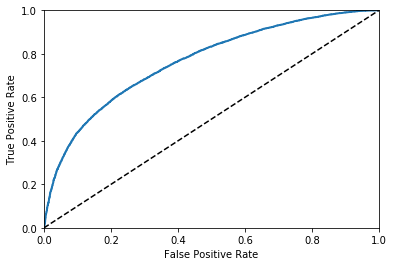

In [58]:
#GRAFICANDO LA CURVA ROC

Y_H_scores= Y_pred_H["logits"]
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(Y_test,Y_H_scores)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [59]:
# AREA BAJO LA CURVA ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred_H['classes'])

0.68777046047528989

In [69]:
# CONTANDO SEÑAL 
senal=0
bkg=0
for i in Y_pred_H["classes"]:
    if i==1:
        senal=senal+1
    else: 
        bkg=bkg+1
print (senal,bkg)


(11067, 8933)


**Clasificador S vs B utilizando LLF.**

In [70]:
# ENTRENAMIENTO RED NEURONAL SUPERFICAL (300 NUERONAS EN LA CAPA) PARA LLF

config = tf.contrib.learn.RunConfig(tf_random_seed=42) 

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_L_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300], n_classes=2,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_L_train, Y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb38481a9d0>, '_model_dir': '/tmp/tmppxWTdW', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': 42, '_save_summary_steps': 100, '_environment': 'local', '_num_worker_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_master': ''}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmppxWTdW/model.ckpt.
INFO:tensorflow:loss = 0.732425, step = 1
INFO:tensorflow:global_step/sec: 437.258
INFO:tensorflow:loss = 0.727013, step = 101 (0.224 sec)
INFO:tensorflow:global_step/sec: 440.407
INFO:tensorflow:loss = 0.659756, step = 201 (0.228 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 498.137
INFO:tensorflow:loss = 0.65218, step = 7201 (0.200 sec)
INFO:tensorflow:global_step/sec: 531.401
INFO:tensorflow:loss = 0.583421, step = 7301 (0.188 sec)
INFO:tensorflow:global_step/sec: 532.756
INFO:tensorflow:loss = 0.676897, step = 7401 (0.188 sec)
INFO:tensorflow:global_step/sec: 519.195
INFO:tensorflow:loss = 0.636555, step = 7501 (0.194 sec)
INFO:tensorflow:global_step/sec: 523.004
INFO:tensorflow:loss = 0.654841, step = 7601 (0.190 sec)
INFO:tensorflow:global_step/sec: 532.995
INFO:tensorflow:loss = 0.594754, step = 7701 (0.187 sec)
INFO:tensorflow:global_step/sec: 530.057
INFO:tensorflow:loss = 0.642964, step = 7801 (0.189 sec)
INFO:tensorflow:global_step/sec: 518.135
INFO:tensorflow:loss = 0.590502, step = 7901 (0.195 sec)
INFO:tensorflow:global_step/sec: 510.371
INFO:tensorflow:loss = 0.702834, step = 8001 (0.194 sec)
INFO:tensorflow:global_step/sec: 514.42
INFO:tensorflow:loss = 0.709364, step = 8101 (0.195 sec)
INFO:tensorflow:global

INFO:tensorflow:loss = 0.613001, step = 15501 (0.206 sec)
INFO:tensorflow:global_step/sec: 457.248
INFO:tensorflow:loss = 0.692379, step = 15601 (0.218 sec)
INFO:tensorflow:global_step/sec: 510.736
INFO:tensorflow:loss = 0.650227, step = 15701 (0.196 sec)
INFO:tensorflow:global_step/sec: 470.542
INFO:tensorflow:loss = 0.664345, step = 15801 (0.213 sec)
INFO:tensorflow:global_step/sec: 527.298
INFO:tensorflow:loss = 0.589137, step = 15901 (0.199 sec)
INFO:tensorflow:global_step/sec: 500.473
INFO:tensorflow:loss = 0.671668, step = 16001 (0.190 sec)
INFO:tensorflow:global_step/sec: 526.665
INFO:tensorflow:loss = 0.712802, step = 16101 (0.194 sec)
INFO:tensorflow:global_step/sec: 512.991
INFO:tensorflow:loss = 0.653846, step = 16201 (0.192 sec)
INFO:tensorflow:global_step/sec: 508.782
INFO:tensorflow:loss = 0.650966, step = 16301 (0.195 sec)
INFO:tensorflow:global_step/sec: 530.076
INFO:tensorflow:loss = 0.588655, step = 16401 (0.189 sec)
INFO:tensorflow:global_step/sec: 531.516
INFO:tenso

INFO:tensorflow:loss = 0.660363, step = 23801 (0.307 sec)
INFO:tensorflow:global_step/sec: 443.158
INFO:tensorflow:loss = 0.610492, step = 23901 (0.223 sec)
INFO:tensorflow:global_step/sec: 478.556
INFO:tensorflow:loss = 0.622928, step = 24001 (0.210 sec)
INFO:tensorflow:global_step/sec: 515.4
INFO:tensorflow:loss = 0.61782, step = 24101 (0.193 sec)
INFO:tensorflow:global_step/sec: 547.667
INFO:tensorflow:loss = 0.573802, step = 24201 (0.182 sec)
INFO:tensorflow:global_step/sec: 492.926
INFO:tensorflow:loss = 0.615874, step = 24301 (0.203 sec)
INFO:tensorflow:global_step/sec: 514.729
INFO:tensorflow:loss = 0.60507, step = 24401 (0.194 sec)
INFO:tensorflow:global_step/sec: 488.205
INFO:tensorflow:loss = 0.629511, step = 24501 (0.206 sec)
INFO:tensorflow:global_step/sec: 402.299
INFO:tensorflow:loss = 0.593988, step = 24601 (0.253 sec)
INFO:tensorflow:global_step/sec: 340.467
INFO:tensorflow:loss = 0.592816, step = 24701 (0.289 sec)
INFO:tensorflow:global_step/sec: 463.671
INFO:tensorflo

INFO:tensorflow:global_step/sec: 288.583
INFO:tensorflow:loss = 0.634282, step = 32201 (0.345 sec)
INFO:tensorflow:global_step/sec: 334.339
INFO:tensorflow:loss = 0.580755, step = 32301 (0.299 sec)
INFO:tensorflow:global_step/sec: 514.935
INFO:tensorflow:loss = 0.629845, step = 32401 (0.195 sec)
INFO:tensorflow:global_step/sec: 430.851
INFO:tensorflow:loss = 0.57232, step = 32501 (0.232 sec)
INFO:tensorflow:global_step/sec: 414.015
INFO:tensorflow:loss = 0.563884, step = 32601 (0.246 sec)
INFO:tensorflow:global_step/sec: 511.206
INFO:tensorflow:loss = 0.578888, step = 32701 (0.191 sec)
INFO:tensorflow:global_step/sec: 524.574
INFO:tensorflow:loss = 0.594353, step = 32801 (0.190 sec)
INFO:tensorflow:global_step/sec: 452.644
INFO:tensorflow:loss = 0.613846, step = 32901 (0.228 sec)
INFO:tensorflow:global_step/sec: 348.607
INFO:tensorflow:loss = 0.569579, step = 33001 (0.280 sec)
INFO:tensorflow:global_step/sec: 316.337
INFO:tensorflow:loss = 0.630896, step = 33101 (0.318 sec)
INFO:tensor

SKCompat()

In [71]:
# CALCULANDO PRECISION DE LA RED NEURONAL 

from sklearn.metrics import accuracy_score

Y_pred_L = dnn_clf.predict(X_L_test)


accuracy_score(Y_test, Y_pred_L['classes'])

INFO:tensorflow:Restoring parameters from /tmp/tmppxWTdW/model.ckpt-40000


0.63865000000000005

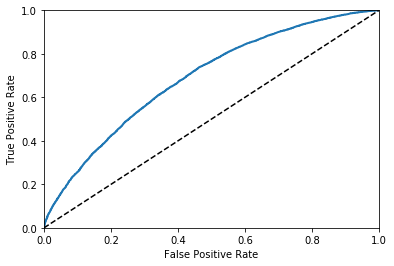

In [72]:
#GRAFICANDO LA CURVA ROC

Y_L_scores= Y_pred_L["logits"]
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(Y_test,Y_L_scores)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [73]:
# AREA BAJO LA CURVA ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred_L['classes'])

0.63600202758101454

**Clasificador S vs B utilizando LLF+HLF.**

In [74]:
# ENTRENAMIENTO RED NEURONAL SUPERFICAL (300 NUERONAS EN LA CAPA) PARA LLF+HLF

config = tf.contrib.learn.RunConfig(tf_random_seed=42) 

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_L_H_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300], n_classes=2,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_L_H_train, Y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb374fa92d0>, '_model_dir': '/tmp/tmphPKIFr', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': 42, '_save_summary_steps': 100, '_environment': 'local', '_num_worker_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_master': ''}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmphPKIFr/model.ckpt.
INFO:tensorflow:loss = 0.71538, step = 1
INFO:tensorflow:global_step/sec: 495.999
INFO:tensorflow:loss = 0.747957, step = 101 (0.205 sec)
INFO:tensorflow:global_step/sec: 485.049
INFO:tensorflow:loss = 0.636796, step = 201 (0.204 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 462.045
INFO:tensorflow:loss = 0.596214, step = 7201 (0.219 sec)
INFO:tensorflow:global_step/sec: 500.814
INFO:tensorflow:loss = 0.554288, step = 7301 (0.198 sec)
INFO:tensorflow:global_step/sec: 484.093
INFO:tensorflow:loss = 0.583235, step = 7401 (0.205 sec)
INFO:tensorflow:global_step/sec: 516.94
INFO:tensorflow:loss = 0.583926, step = 7501 (0.193 sec)
INFO:tensorflow:global_step/sec: 470.879
INFO:tensorflow:loss = 0.564622, step = 7601 (0.214 sec)
INFO:tensorflow:global_step/sec: 487.279
INFO:tensorflow:loss = 0.515016, step = 7701 (0.204 sec)
INFO:tensorflow:global_step/sec: 492.737
INFO:tensorflow:loss = 0.617464, step = 7801 (0.204 sec)
INFO:tensorflow:global_step/sec: 496.862
INFO:tensorflow:loss = 0.528862, step = 7901 (0.201 sec)
INFO:tensorflow:global_step/sec: 462.214
INFO:tensorflow:loss = 0.625729, step = 8001 (0.219 sec)
INFO:tensorflow:global_step/sec: 476.819
INFO:tensorflow:loss = 0.690517, step = 8101 (0.206 sec)
INFO:tensorflow:globa

INFO:tensorflow:loss = 0.580837, step = 15501 (0.207 sec)
INFO:tensorflow:global_step/sec: 488.832
INFO:tensorflow:loss = 0.595119, step = 15601 (0.204 sec)
INFO:tensorflow:global_step/sec: 518.207
INFO:tensorflow:loss = 0.637674, step = 15701 (0.194 sec)
INFO:tensorflow:global_step/sec: 510.762
INFO:tensorflow:loss = 0.596976, step = 15801 (0.196 sec)
INFO:tensorflow:global_step/sec: 487.577
INFO:tensorflow:loss = 0.558789, step = 15901 (0.204 sec)
INFO:tensorflow:global_step/sec: 502.321
INFO:tensorflow:loss = 0.599047, step = 16001 (0.199 sec)
INFO:tensorflow:global_step/sec: 495.229
INFO:tensorflow:loss = 0.545622, step = 16101 (0.202 sec)
INFO:tensorflow:global_step/sec: 507.787
INFO:tensorflow:loss = 0.544327, step = 16201 (0.197 sec)
INFO:tensorflow:global_step/sec: 505.012
INFO:tensorflow:loss = 0.589726, step = 16301 (0.198 sec)
INFO:tensorflow:global_step/sec: 503.268
INFO:tensorflow:loss = 0.5524, step = 16401 (0.200 sec)
INFO:tensorflow:global_step/sec: 500.699
INFO:tensorf

INFO:tensorflow:loss = 0.606887, step = 23801 (0.228 sec)
INFO:tensorflow:global_step/sec: 334.812
INFO:tensorflow:loss = 0.569908, step = 23901 (0.300 sec)
INFO:tensorflow:global_step/sec: 342.867
INFO:tensorflow:loss = 0.580626, step = 24001 (0.290 sec)
INFO:tensorflow:global_step/sec: 493.501
INFO:tensorflow:loss = 0.587045, step = 24101 (0.204 sec)
INFO:tensorflow:global_step/sec: 336.695
INFO:tensorflow:loss = 0.550429, step = 24201 (0.297 sec)
INFO:tensorflow:global_step/sec: 340.826
INFO:tensorflow:loss = 0.56662, step = 24301 (0.292 sec)
INFO:tensorflow:global_step/sec: 371.405
INFO:tensorflow:loss = 0.552658, step = 24401 (0.269 sec)
INFO:tensorflow:global_step/sec: 397.719
INFO:tensorflow:loss = 0.572749, step = 24501 (0.253 sec)
INFO:tensorflow:global_step/sec: 428.539
INFO:tensorflow:loss = 0.557295, step = 24601 (0.238 sec)
INFO:tensorflow:global_step/sec: 223.847
INFO:tensorflow:loss = 0.590307, step = 24701 (0.441 sec)
INFO:tensorflow:global_step/sec: 343.401
INFO:tensor

INFO:tensorflow:loss = 0.679963, step = 32101 (0.217 sec)
INFO:tensorflow:global_step/sec: 492.39
INFO:tensorflow:loss = 0.557502, step = 32201 (0.203 sec)
INFO:tensorflow:global_step/sec: 502.068
INFO:tensorflow:loss = 0.582148, step = 32301 (0.199 sec)
INFO:tensorflow:global_step/sec: 506.511
INFO:tensorflow:loss = 0.576962, step = 32401 (0.197 sec)
INFO:tensorflow:global_step/sec: 509.881
INFO:tensorflow:loss = 0.479709, step = 32501 (0.196 sec)
INFO:tensorflow:global_step/sec: 483.106
INFO:tensorflow:loss = 0.513697, step = 32601 (0.208 sec)
INFO:tensorflow:global_step/sec: 514.16
INFO:tensorflow:loss = 0.515357, step = 32701 (0.193 sec)
INFO:tensorflow:global_step/sec: 509.022
INFO:tensorflow:loss = 0.494243, step = 32801 (0.197 sec)
INFO:tensorflow:global_step/sec: 515.363
INFO:tensorflow:loss = 0.579332, step = 32901 (0.193 sec)
INFO:tensorflow:global_step/sec: 486.084
INFO:tensorflow:loss = 0.478168, step = 33001 (0.206 sec)
INFO:tensorflow:global_step/sec: 511.739
INFO:tensorf

SKCompat()

In [79]:
# CALCULANDO PRECISION DE LA RED NEURONAL 

from sklearn.metrics import accuracy_score

Y_pred_L_H = dnn_clf.predict(X_L_H_test)
accuracy_score(Y_test, Y_pred_L_H['classes'])

INFO:tensorflow:Restoring parameters from /tmp/tmphPKIFr/model.ckpt-40000


0.69005000000000005

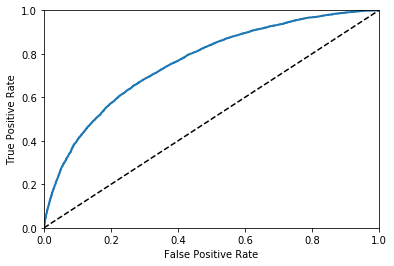

In [80]:
#GRAFICANDO LA CURVA ROC

Y_L_H_scores= Y_pred_L_H["logits"]
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(Y_test,Y_L_H_scores)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [81]:
# AREA BAJO LA CURVA ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred_L_H['classes'])

0.68770293987229214

# ML con DNN.

In [82]:
# ENTRENAMIENTO RED NEURONAL SUPERFICAL (300 NUERONAS EN LA CAPA) PARA HLF

config = tf.contrib.learn.RunConfig(tf_random_seed=42) 

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_H_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,300,300], n_classes=2,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_H_train, Y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb3750fdad0>, '_model_dir': '/tmp/tmpVJSVLz', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': 42, '_save_summary_steps': 100, '_environment': 'local', '_num_worker_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_master': ''}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpVJSVLz/model.ckpt.
INFO:tensorflow:loss = 0.681845, step = 1
INFO:tensorflow:global_step/sec: 232.395
INFO:tensorflow:loss = 0.736721, step = 101 (0.432 sec)
INFO:tensorflow:global_step/sec: 233.131
INFO:tensorflow:loss = 0.674915, step = 201 (0.429 sec)
INFO:tensorf

INFO:tensorflow:loss = 0.512577, step = 7201 (0.835 sec)
INFO:tensorflow:global_step/sec: 140.481
INFO:tensorflow:loss = 0.531543, step = 7301 (0.715 sec)
INFO:tensorflow:global_step/sec: 110.404
INFO:tensorflow:loss = 0.534746, step = 7401 (0.905 sec)
INFO:tensorflow:global_step/sec: 227.161
INFO:tensorflow:loss = 0.559117, step = 7501 (0.437 sec)
INFO:tensorflow:global_step/sec: 160.569
INFO:tensorflow:loss = 0.539766, step = 7601 (0.624 sec)
INFO:tensorflow:global_step/sec: 173.817
INFO:tensorflow:loss = 0.492756, step = 7701 (0.574 sec)
INFO:tensorflow:global_step/sec: 163.24
INFO:tensorflow:loss = 0.551695, step = 7801 (0.613 sec)
INFO:tensorflow:global_step/sec: 175.925
INFO:tensorflow:loss = 0.577673, step = 7901 (0.571 sec)
INFO:tensorflow:global_step/sec: 217.054
INFO:tensorflow:loss = 0.574869, step = 8001 (0.463 sec)
INFO:tensorflow:global_step/sec: 168.935
INFO:tensorflow:loss = 0.565977, step = 8101 (0.588 sec)
INFO:tensorflow:global_step/sec: 241.232
INFO:tensorflow:loss 

INFO:tensorflow:global_step/sec: 147.52
INFO:tensorflow:loss = 0.568634, step = 15601 (0.673 sec)
INFO:tensorflow:global_step/sec: 157.8
INFO:tensorflow:loss = 0.616106, step = 15701 (0.632 sec)
INFO:tensorflow:global_step/sec: 241.476
INFO:tensorflow:loss = 0.558236, step = 15801 (0.413 sec)
INFO:tensorflow:global_step/sec: 249.096
INFO:tensorflow:loss = 0.586328, step = 15901 (0.404 sec)
INFO:tensorflow:global_step/sec: 246.954
INFO:tensorflow:loss = 0.630406, step = 16001 (0.404 sec)
INFO:tensorflow:global_step/sec: 246.188
INFO:tensorflow:loss = 0.530106, step = 16101 (0.405 sec)
INFO:tensorflow:global_step/sec: 236.109
INFO:tensorflow:loss = 0.548674, step = 16201 (0.424 sec)
INFO:tensorflow:global_step/sec: 238.898
INFO:tensorflow:loss = 0.576292, step = 16301 (0.421 sec)
INFO:tensorflow:global_step/sec: 180.497
INFO:tensorflow:loss = 0.600394, step = 16401 (0.553 sec)
INFO:tensorflow:global_step/sec: 201.941
INFO:tensorflow:loss = 0.611766, step = 16501 (0.496 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 236.543
INFO:tensorflow:loss = 0.518271, step = 23901 (0.423 sec)
INFO:tensorflow:global_step/sec: 233.68
INFO:tensorflow:loss = 0.597325, step = 24001 (0.428 sec)
INFO:tensorflow:global_step/sec: 241.089
INFO:tensorflow:loss = 0.591518, step = 24101 (0.413 sec)
INFO:tensorflow:global_step/sec: 236.854
INFO:tensorflow:loss = 0.493238, step = 24201 (0.426 sec)
INFO:tensorflow:global_step/sec: 234.182
INFO:tensorflow:loss = 0.644916, step = 24301 (0.424 sec)
INFO:tensorflow:global_step/sec: 234.464
INFO:tensorflow:loss = 0.624501, step = 24401 (0.427 sec)
INFO:tensorflow:global_step/sec: 241.829
INFO:tensorflow:loss = 0.510963, step = 24501 (0.414 sec)
INFO:tensorflow:global_step/sec: 245.293
INFO:tensorflow:loss = 0.572376, step = 24601 (0.408 sec)
INFO:tensorflow:global_step/sec: 238.199
INFO:tensorflow:loss = 0.618071, step = 24701 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.772
INFO:tensorflow:loss = 0.57896, step = 24801 (0.418 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 211.322
INFO:tensorflow:loss = 0.612177, step = 32201 (0.474 sec)
INFO:tensorflow:global_step/sec: 225.578
INFO:tensorflow:loss = 0.638589, step = 32301 (0.444 sec)
INFO:tensorflow:global_step/sec: 242.089
INFO:tensorflow:loss = 0.627811, step = 32401 (0.412 sec)
INFO:tensorflow:global_step/sec: 238.447
INFO:tensorflow:loss = 0.655133, step = 32501 (0.420 sec)
INFO:tensorflow:global_step/sec: 241.459
INFO:tensorflow:loss = 0.500334, step = 32601 (0.414 sec)
INFO:tensorflow:global_step/sec: 236.887
INFO:tensorflow:loss = 0.534471, step = 32701 (0.422 sec)
INFO:tensorflow:global_step/sec: 241.226
INFO:tensorflow:loss = 0.578959, step = 32801 (0.414 sec)
INFO:tensorflow:global_step/sec: 235.771
INFO:tensorflow:loss = 0.686029, step = 32901 (0.425 sec)
INFO:tensorflow:global_step/sec: 238.884
INFO:tensorflow:loss = 0.531788, step = 33001 (0.418 sec)
INFO:tensorflow:global_step/sec: 241.104
INFO:tensorflow:loss = 0.577624, step = 33101 (0.417 sec)
INFO:tenso

SKCompat()

In [83]:
# CALCULANDO PRECISION DE LA RED NEURONAL 

# PUNTUACION DE PRECISION

from sklearn.metrics import accuracy_score

Y_pred_H = dnn_clf.predict(X_H_test)
accuracy_score(Y_test, Y_pred_H['classes'])

INFO:tensorflow:Restoring parameters from /tmp/tmpVJSVLz/model.ckpt-40000


0.69930000000000003

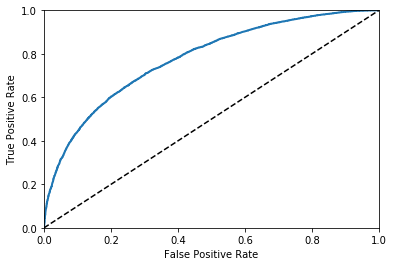

In [84]:
#GRAFICANDO LA CURVA ROC

Y_H_scores= Y_pred_H["logits"]
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(Y_test,Y_H_scores)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [85]:
# AREA BAJO LA CURVA ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred_H['classes'])

0.69784233716868771

** Clasificador DNN con LLF.**

In [86]:
# ENTRENAMIENTO RED NEURONAL SUPERFICAL (300 NUERONAS EN LA CAPA) PARA LLF

config = tf.contrib.learn.RunConfig(tf_random_seed=42) 

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_L_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,300,300], n_classes=2,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_L_train, Y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb337eef150>, '_model_dir': '/tmp/tmpO0p_E9', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': 42, '_save_summary_steps': 100, '_environment': 'local', '_num_worker_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_master': ''}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpO0p_E9/model.ckpt.
INFO:tensorflow:loss = 0.701681, step = 1
INFO:tensorflow:global_step/sec: 173.336
INFO:tensorflow:loss = 0.710954, step = 101 (0.583 sec)
INFO:tensorflow:global_step/sec: 219.059
INFO:tensorflow:loss = 0.67022, step = 201 (0.452 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 229.122
INFO:tensorflow:loss = 0.620968, step = 7201 (0.437 sec)
INFO:tensorflow:global_step/sec: 237.748
INFO:tensorflow:loss = 0.581527, step = 7301 (0.421 sec)
INFO:tensorflow:global_step/sec: 235.286
INFO:tensorflow:loss = 0.599787, step = 7401 (0.425 sec)
INFO:tensorflow:global_step/sec: 172.378
INFO:tensorflow:loss = 0.630114, step = 7501 (0.583 sec)
INFO:tensorflow:global_step/sec: 122.444
INFO:tensorflow:loss = 0.581967, step = 7601 (0.816 sec)
INFO:tensorflow:global_step/sec: 170.44
INFO:tensorflow:loss = 0.577783, step = 7701 (0.585 sec)
INFO:tensorflow:global_step/sec: 234.742
INFO:tensorflow:loss = 0.62875, step = 7801 (0.427 sec)
INFO:tensorflow:global_step/sec: 165.268
INFO:tensorflow:loss = 0.568236, step = 7901 (0.605 sec)
INFO:tensorflow:global_step/sec: 235.027
INFO:tensorflow:loss = 0.685421, step = 8001 (0.424 sec)
INFO:tensorflow:global_step/sec: 231.783
INFO:tensorflow:loss = 0.697297, step = 8101 (0.432 sec)
INFO:tensorflow:global

INFO:tensorflow:loss = 0.552799, step = 15501 (0.427 sec)
INFO:tensorflow:global_step/sec: 224.593
INFO:tensorflow:loss = 0.640079, step = 15601 (0.448 sec)
INFO:tensorflow:global_step/sec: 233.917
INFO:tensorflow:loss = 0.648224, step = 15701 (0.425 sec)
INFO:tensorflow:global_step/sec: 236.713
INFO:tensorflow:loss = 0.601825, step = 15801 (0.423 sec)
INFO:tensorflow:global_step/sec: 231.719
INFO:tensorflow:loss = 0.567911, step = 15901 (0.431 sec)
INFO:tensorflow:global_step/sec: 237.401
INFO:tensorflow:loss = 0.615955, step = 16001 (0.421 sec)
INFO:tensorflow:global_step/sec: 232.259
INFO:tensorflow:loss = 0.641988, step = 16101 (0.431 sec)
INFO:tensorflow:global_step/sec: 234.773
INFO:tensorflow:loss = 0.633519, step = 16201 (0.426 sec)
INFO:tensorflow:global_step/sec: 232.456
INFO:tensorflow:loss = 0.550371, step = 16301 (0.431 sec)
INFO:tensorflow:global_step/sec: 231.957
INFO:tensorflow:loss = 0.545173, step = 16401 (0.431 sec)
INFO:tensorflow:global_step/sec: 237.993
INFO:tenso

INFO:tensorflow:loss = 0.64248, step = 23801 (0.435 sec)
INFO:tensorflow:global_step/sec: 233.922
INFO:tensorflow:loss = 0.519251, step = 23901 (0.428 sec)
INFO:tensorflow:global_step/sec: 225.655
INFO:tensorflow:loss = 0.507328, step = 24001 (0.442 sec)
INFO:tensorflow:global_step/sec: 227.766
INFO:tensorflow:loss = 0.564964, step = 24101 (0.442 sec)
INFO:tensorflow:global_step/sec: 232.42
INFO:tensorflow:loss = 0.52659, step = 24201 (0.427 sec)
INFO:tensorflow:global_step/sec: 232.514
INFO:tensorflow:loss = 0.441164, step = 24301 (0.431 sec)
INFO:tensorflow:global_step/sec: 232.125
INFO:tensorflow:loss = 0.620614, step = 24401 (0.430 sec)
INFO:tensorflow:global_step/sec: 234.802
INFO:tensorflow:loss = 0.506175, step = 24501 (0.429 sec)
INFO:tensorflow:global_step/sec: 232.216
INFO:tensorflow:loss = 0.514593, step = 24601 (0.427 sec)
INFO:tensorflow:global_step/sec: 230.06
INFO:tensorflow:loss = 0.50282, step = 24701 (0.435 sec)
INFO:tensorflow:global_step/sec: 230.238
INFO:tensorflow

INFO:tensorflow:global_step/sec: 244.243
INFO:tensorflow:loss = 0.455347, step = 32201 (0.408 sec)
INFO:tensorflow:global_step/sec: 240.673
INFO:tensorflow:loss = 0.369954, step = 32301 (0.416 sec)
INFO:tensorflow:global_step/sec: 240.543
INFO:tensorflow:loss = 0.430443, step = 32401 (0.416 sec)
INFO:tensorflow:global_step/sec: 215.897
INFO:tensorflow:loss = 0.439764, step = 32501 (0.469 sec)
INFO:tensorflow:global_step/sec: 150.004
INFO:tensorflow:loss = 0.470099, step = 32601 (0.681 sec)
INFO:tensorflow:global_step/sec: 154.626
INFO:tensorflow:loss = 0.445436, step = 32701 (0.626 sec)
INFO:tensorflow:global_step/sec: 170.908
INFO:tensorflow:loss = 0.497228, step = 32801 (0.585 sec)
INFO:tensorflow:global_step/sec: 169.232
INFO:tensorflow:loss = 0.558369, step = 32901 (0.591 sec)
INFO:tensorflow:global_step/sec: 148.908
INFO:tensorflow:loss = 0.449211, step = 33001 (0.676 sec)
INFO:tensorflow:global_step/sec: 133.448
INFO:tensorflow:loss = 0.514157, step = 33101 (0.754 sec)
INFO:tenso

SKCompat()

In [87]:
# CALCULANDO PRECISION DE LA RED NEURONAL 

from sklearn.metrics import accuracy_score

Y_pred_L = dnn_clf.predict(X_L_test)


accuracy_score(Y_test, Y_pred_L['classes'])

INFO:tensorflow:Restoring parameters from /tmp/tmpO0p_E9/model.ckpt-40000


0.63854999999999995

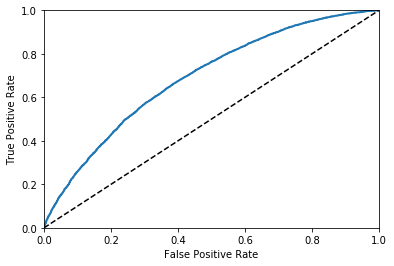

In [88]:
#GRAFICANDO LA CURVA ROC

Y_L_scores= Y_pred_L["logits"]
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(Y_test,Y_L_scores)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [89]:
# AREA BAJO LA CURVA ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred_L['classes'])

0.63567766429268957

10386
